In [1]:
path_data = '../../data/'

import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Cross-Classifying by More than One Variable

When individuals have multiple features, there are many different ways to classify them. For example, if we have a population of college students for each of whom we have recorded a major and the number of years in college, then the students could be classified by major, or by year, or by a combination of major and year.

The `group` method also allows us to classify individuals according to multiple variables. This is called *cross-classifying*.

## Two Variables: Counting the Number in Each Paired Category
The table `more_cones` records the flavor, color, and price of six ice cream cones.

In [2]:
more_cones = pd.DataFrame({
    'Flavor':np.array(['strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum']),
    'Color':np.array(['pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink']),
    'Price':np.array([3.55, 4.75, 5.25, 5.25, 5.25, 4.75])}
)

more_cones

Flavor        Color  Price
0  strawberry         pink   3.55
1   chocolate  light brown   4.75
2   chocolate   dark brown   5.25
3  strawberry         pink   5.25
4   chocolate   dark brown   5.25
5   bubblegum         pink   4.75

We know how to use `group` to count the number of cones of each flavor:

In [3]:
more_cones.groupby('Flavor').count()

Color  Price
Flavor                  
bubblegum       1      1
chocolate       3      3
strawberry      2      2

**Or**, using the aggregation framework ..

In [4]:
more_cones.groupby(['Flavor']).Flavor.agg('count').to_frame('count')#.reset_index()

count
Flavor           
bubblegum       1
chocolate       3
strawberry      2

Using the aggregation and resetting the index give ..

In [5]:
more_cones.groupby(['Flavor']).Flavor.agg('count').to_frame('count').reset_index()

Flavor  count
0   bubblegum      1
1   chocolate      3
2  strawberry      2

But now each cone has a color as well. To classify the cones by both flavor and color, we will pass a list of labels as an argument to `group`. The resulting table has one row for every *unique combination* of values that appear together in the grouped columns. As before, a single argument (a list, in this case, but an array would work too) gives row counts.

In [6]:
more_cones.groupby('Flavor').count()

Color  Price
Flavor                  
bubblegum       1      1
chocolate       3      3
strawberry      2      2

Although there are six cones, there are only four unique combinations of flavor and color. Two of the cones were dark brown chocolate, and two pink strawberry.

In [7]:
more_cones.groupby(['Flavor', 'Color']).count()

Price
Flavor     Color             
bubblegum  pink             1
chocolate  dark brown       2
           light brown      1
strawberry pink             2

**Or** ..

In [8]:
more_cones.groupby(['Flavor', 'Color']).Flavor.agg('count').to_frame('count')

count
Flavor     Color             
bubblegum  pink             1
chocolate  dark brown       2
           light brown      1
strawberry pink             2

**Or** ..

In [9]:
more_cones.groupby(['Flavor', 'Color']).Flavor.agg('count').to_frame('count').reset_index()

Flavor        Color  count
0   bubblegum         pink      1
1   chocolate   dark brown      2
2   chocolate  light brown      1
3  strawberry         pink      2

### Two Variables: Finding a Characteristic of Each Paired Category
A second argument aggregates all other columns that are not in the list of grouped columns.

In [10]:
more_cones.groupby(['Flavor', 'Color']).sum()

#Or ..

#more_cones.groupby(['Flavor', 'Color']).Price.agg('sum').to_frame('Price sum').reset_index()

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.50
           light brown   4.75
strawberry pink          8.80

**Three or More Variables.** You can use `group` to classify rows by three or more categorical variables. Just include them all in the list that is the first argument. But cross-classifying by multiple variables can become complex, as the number of distinct combinations of categories can be quite large. 

### Pivot Tables: Rearranging the Output of `group`
Many uses of cross-classification involve just two categorical variables, like `Flavor` and `Color` in the example above. In these cases it is possible to display the results of the classification in a different kind of table, called a *pivot table*. Pivot tables, also known as *contingency tables*, make it easier to work with data that have been classified according to two variables.

Recall the use of `group` to count the number of cones in each paired category of flavor and color:

In [11]:
more_cones_pivot = more_cones.groupby(['Flavor', 'Color']).Color.agg('count').to_frame('count').reset_index()

more_cones_pivot

Flavor        Color  count
0   bubblegum         pink      1
1   chocolate   dark brown      2
2   chocolate  light brown      1
3  strawberry         pink      2

The same data can be displayed differenly using the Table method `pivot`. Ignore the code for a moment, and just examine the table of outcomes.

[Pandas pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [12]:
#more_cones_pivot.pivot(index='Color', columns='Flavor', values='count').fillna(0).reset_index()

#Or

more_cones_pivot.pivot(index='Color', columns='Flavor', values='count').fillna(0)

Flavor       bubblegum  chocolate  strawberry
Color                                        
dark brown         0.0        2.0         0.0
light brown        0.0        1.0         0.0
pink               1.0        0.0         2.0

Notice how this df displays all nine possible pairs of flavor and color, including pairs like "dark brown bubblegum" that don't exist in our data. Notice also that the count in each pair appears in the body of the DataFrame: to find the number of light brown chocolate cones, run your eye along the row `light brown` until it meets the column `chocolate`.

The `groupby` method takes a list of two labels because it is flexible: it could take one or three or more. On the other hand, `pivot` always takes **two** column labels, one to determine the columns and one to determine the rows.

**`pivot`** 

The `pivot` method is closely related to the `groupby` method: it groups together rows that share a combination of values. It differs from `groupby` because it organizes the resulting values in a grid. The first argument to `pivot` is the label of a column that contains the values that will be used to form new columns in the result. The second argument is the label of a column used for the rows. The result gives the count of all rows of the original table that share the combination of column and row values.

Like `groupby`, `pivot` can be used with additional arguments to find characteristics of each paired category. An optional third argument called `values` indicates a column of values that will replace the counts in each cell of the grid.

All of these values will not be displayed, however; the fourth argument `aggfunc` indicates how to collect them all into one aggregated value to be displayed in the cell.

An example will help clarify this. Here is `pivot` being used to find the total price of the cones in each cell.  

pd.pivot_table(*dataframe*, values='data upon which aggfunc acts', index= ,columns= , aggfunc=*aggregation function*).fillna(0)*replace NaN with 0*

In [13]:
pd.pivot_table(more_cones, values='Price', index=['Color'], columns=['Flavor'], aggfunc=np.sum).fillna(0)

#what happens when we add '.reset_index()' to the code?

Flavor       bubblegum  chocolate  strawberry
Color                                        
dark brown        0.00      10.50         0.0
light brown       0.00       4.75         0.0
pink              4.75       0.00         8.8

And here is `group` doing the same thing.

In [14]:
more_cones.groupby(['Flavor', 'Color']).sum()

Price
Flavor     Color             
bubblegum  pink          4.75
chocolate  dark brown   10.50
           light brown   4.75
strawberry pink          8.80

Though the numbers in both tables are the same, table produced by `pivot` is easier to read and lends itself more easily to analysis. The advantage of `pivot` is that it places grouped values into adjacent columns, so that they can be combined and compared.

### Example: Education and Income of Californian Adults
The State of California's Open Data Portal is a rich source of information about the lives of Californians. It is our source of a [dataset](http://data.ca.gov/dataset/ca-educational-attainment-personal-income) on educational attainment and personal income among Californians over the years 2008 to 2014. The data are derived from the U.S. Census Current Population Survey.

For each year, the table records the `Population Count` of Californians in many different combinations of age, gender, educational attainment, and personal income. We will study only the data for the year 2014.

In [15]:
full_table = pd.read_csv(path_data + 'educ_inc.csv')

ca_2014 = full_table[(full_table['Year'] == '1/1/14 0:00') & (full_table['Age'] != '00 to 17')]

ca_2014.head(10)

Year        Age  Gender          Educational Attainment  \
885  1/1/14 0:00   18 to 64  Female          No high school diploma   
886  1/1/14 0:00  65 to 80+    Male          No high school diploma   
894  1/1/14 0:00  65 to 80+  Female          No high school diploma   
895  1/1/14 0:00  65 to 80+  Female       High school or equivalent   
896  1/1/14 0:00  65 to 80+  Female          No high school diploma   
897  1/1/14 0:00  65 to 80+    Male          No high school diploma   
900  1/1/14 0:00   18 to 64  Female          No high school diploma   
901  1/1/14 0:00  65 to 80+    Male          No high school diploma   
902  1/1/14 0:00  65 to 80+    Male  College, less than 4-yr degree   
903  1/1/14 0:00  65 to 80+  Female     Bachelor's degree or higher   

         Personal Income  Population Count  
885   H: 75,000 and over              2058  
886   H: 75,000 and over              2153  
894  G: 50,000 to 74,999              4666  
895   H: 75,000 and over              7122  
896  F: 35,000 to 49,999              7261  
897  G: 50,000 to 74,999              8569  
900  G: 50,000 to 74,999             14635  
901  F: 35,000 to 49,999             15212  
902    B: 5,000 to 9,999             15423  
903        A: 0 to 4,999             15459

Each row of the table corresponds to a combination of age, gender, educational level, and income. There are 127 such combinations in all! 

As a first step it is a good idea to start with just one or two variables. We will focus on just one pair: educational attainment and personal income. 

In [16]:
educ_inc = ca_2014[['Educational Attainment', 'Personal Income', 'Population Count']]

educ_inc.head(10)

Educational Attainment      Personal Income  Population Count
885          No high school diploma   H: 75,000 and over              2058
886          No high school diploma   H: 75,000 and over              2153
894          No high school diploma  G: 50,000 to 74,999              4666
895       High school or equivalent   H: 75,000 and over              7122
896          No high school diploma  F: 35,000 to 49,999              7261
897          No high school diploma  G: 50,000 to 74,999              8569
900          No high school diploma  G: 50,000 to 74,999             14635
901          No high school diploma  F: 35,000 to 49,999             15212
902  College, less than 4-yr degree    B: 5,000 to 9,999             15423
903     Bachelor's degree or higher        A: 0 to 4,999             15459

Let's start by looking at educational level alone. The categories of this variable have been subdivided by the different levels of income. So we will group the table by `Educational Attainment` and `sum` the `Population Count` in each category.

In [17]:
education = educ_inc[['Educational Attainment', 'Population Count']]

educ_totals = education.groupby('Educational Attainment').sum()

educ_totals = educ_totals.rename(columns={'Population Count': 'Population Count sum'})#.reset_index()

educ_totals

Population Count sum
Educational Attainment                              
Bachelor's degree or higher                  8525698
College, less than 4-yr degree               7775497
High school or equivalent                    6294141
No high school diploma                       4258277

There are only four categories of educational attainment. The counts are so large that is is more helpful to look at percents. For this, we will use the function `percents` that we defined in an earlier section. It converts an array of numbers to an array of percents out of the total in the input array.

In [18]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

We now have the distribution of educational attainment among adult Californians. More than 30% have a Bachelor's degree or higher, while almost 16% lack a high school diploma.

In [19]:
educ_distribution = educ_totals.copy()

educ_distribution['Population Percent'] = percents(educ_totals.iloc[:,0])

educ_distribution

Population Count sum  Population Percent
Educational Attainment                                                  
Bachelor's degree or higher                  8525698               31.75
College, less than 4-yr degree               7775497               28.96
High school or equivalent                    6294141               23.44
No high school diploma                       4258277               15.86

By using `pivot`, we can get a contingency table (a table of counts) of adult Californians cross-classified by `Educational Attainment` and `Personal Income`.

In [20]:
totals = pd.pivot_table(educ_inc, values='Population Count',
                  index='Personal Income', columns='Educational Attainment', aggfunc=np.sum)
totals

Educational Attainment  Bachelor's degree or higher  \
Personal Income                                       
A: 0 to 4,999                                575491   
B: 5,000 to 9,999                            326020   
C: 10,000 to 14,999                          452449   
D: 15,000 to 24,999                          773684   
E: 25,000 to 34,999                          693884   
F: 35,000 to 49,999                         1122791   
G: 50,000 to 74,999                         1594681   
H: 75,000 and over                          2986698   

Educational Attainment  College, less than 4-yr degree  \
Personal Income                                          
A: 0 to 4,999                                   985011   
B: 5,000 to 9,999                               810641   
C: 10,000 to 14,999                             798596   
D: 15,000 to 24,999                            1345257   
E: 25,000 to 34,999                            1091642   
F: 35,000 to 49,999                            1112421   
G: 50,000 to 74,999                             883826   
H: 75,000 and over                              748103   

Educational Attainment  High school or equivalent  No high school diploma  
Personal Income                                                            
A: 0 to 4,999                             1161873                 1204529  
B: 5,000 to 9,999                          626499                  597039  
C: 10,000 to 14,999                        692661                  664607  
D: 15,000 to 24,999                       1252377                  875498  
E: 25,000 to 34,999                        929218                  464564  
F: 35,000 to 49,999                        782804                  260579  
G: 50,000 to 74,999                        525517                  132516  
H: 75,000 and over                         323192                   58945

Here you see the power of `pivot` over other cross-classification methods. Each column of counts is a distribution of personal income at a specific level of educational attainment. Converting the counts to percents allows us to compare the four distributions.

In [21]:
distributions = pd.DataFrame({
                              "Bachelor's degree or higher":percents(totals.iloc[:,0]),
                             'College, less than 4-yr degree':percents(totals.iloc[:,1]),
                             'High school or equivalent':percents(totals.iloc[:,2]),
                             'No high school diploma':percents(totals.iloc[:,3])
                            })

distributions.reset_index()

Personal Income  Bachelor's degree or higher  \
0        A: 0 to 4,999                         6.75   
1    B: 5,000 to 9,999                         3.82   
2  C: 10,000 to 14,999                         5.31   
3  D: 15,000 to 24,999                         9.07   
4  E: 25,000 to 34,999                         8.14   
5  F: 35,000 to 49,999                        13.17   
6  G: 50,000 to 74,999                        18.70   
7   H: 75,000 and over                        35.03   

   College, less than 4-yr degree  High school or equivalent  \
0                           12.67                      18.46   
1                           10.43                       9.95   
2                           10.27                      11.00   
3                           17.30                      19.90   
4                           14.04                      14.76   
5                           14.31                      12.44   
6                           11.37                       8.35   
7                            9.62                       5.13   

   No high school diploma  
0                   28.29  
1                   14.02  
2                   15.61  
3                   20.56  
4                   10.91  
5                    6.12  
6                    3.11  
7                    1.38

### Create a 'Barh' chart

To be used as the data source in a horizontal bar chart the index must be converted to an array then included as a column in the DataFrame.

In [22]:
personalIncome = np.array(distributions.index)

distributions['Personal Income'] = personalIncome

distributions

Bachelor's degree or higher  \
Personal Income                                    
A: 0 to 4,999                               6.75   
B: 5,000 to 9,999                           3.82   
C: 10,000 to 14,999                         5.31   
D: 15,000 to 24,999                         9.07   
E: 25,000 to 34,999                         8.14   
F: 35,000 to 49,999                        13.17   
G: 50,000 to 74,999                        18.70   
H: 75,000 and over                         35.03   

                     College, less than 4-yr degree  \
Personal Income                                       
A: 0 to 4,999                                 12.67   
B: 5,000 to 9,999                             10.43   
C: 10,000 to 14,999                           10.27   
D: 15,000 to 24,999                           17.30   
E: 25,000 to 34,999                           14.04   
F: 35,000 to 49,999                           14.31   
G: 50,000 to 74,999                           11.37   
H: 75,000 and over                             9.62   

                     High school or equivalent  No high school diploma  \
Personal Income                                                          
A: 0 to 4,999                            18.46                   28.29   
B: 5,000 to 9,999                         9.95                   14.02   
C: 10,000 to 14,999                      11.00                   15.61   
D: 15,000 to 24,999                      19.90                   20.56   
E: 25,000 to 34,999                      14.76                   10.91   
F: 35,000 to 49,999                      12.44                    6.12   
G: 50,000 to 74,999                       8.35                    3.11   
H: 75,000 and over                        5.13                    1.38   

                         Personal Income  
Personal Income                           
A: 0 to 4,999              A: 0 to 4,999  
B: 5,000 to 9,999      B: 5,000 to 9,999  
C: 10,000 to 14,999  C: 10,000 to 14,999  
D: 15,000 to 24,999  D: 15,000 to 24,999  
E: 25,000 to 34,999  E: 25,000 to 34,999  
F: 35,000 to 49,999  F: 35,000 to 49,999  
G: 50,000 to 74,999  G: 50,000 to 74,999  
H: 75,000 and over    H: 75,000 and over

At a glance, you can see that over 35% of those with Bachelor's degrees or higher had incomes of $\$75,000$ and over, whereas fewer than 10% of the people in the other education categories had that level of income. 

The bar chart below compares the personal income distributions of adult Californians who have no high diploma with those who have completed a Bachelor's degree or higher. The difference in the distributions is striking. There is a clear positive association between educational attainment and personal income.

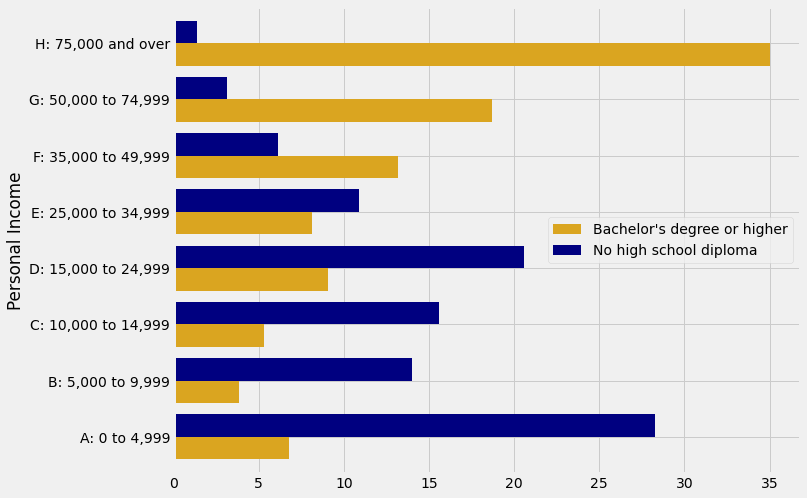

In [23]:
distributions[['Personal Income',
               "Bachelor's degree or higher",
               'No high school diploma']].plot.barh('Personal Income',
                                                    width=0.8,
                                                    figsize=(10,8),
                                                    color=('goldenrod','navy'))
plt.ylabel('Personal Income')

plt.show()